**ABOUT DATASET**

 Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide and this dataset contains 12 features that can be used to predict CVD.
People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.

**ATTRIBUTE INFORMATION**

1. * Age | Objective Feature | age of the patient
2. * Height | Objective Feature | height
3. * Weight | Objective Feature | weight
4. *  Gender | Objective Feature | gender of the patient
5. * Systolic blood pressure | Examination Feature | ap_hi
6. * Diastolic blood pressure | Examination Feature | ap_lo
7. * Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
8. * Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
9. * Smoking | Subjective Feature | smoke
10. * Alcohol intake | Subjective Feature | alco
11. * Physical activity | Subjective Feature | active
12. * Presence or absence of cardiovascular disease | cardio


**IMPORTING THE DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier           
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

**DATA COLLECTION AND PROCESSING**

In [ ]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv('/content/DOC-20230118-WA0039.csv')

In [ ]:
# print first 5 rows of the Dataset
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,55.419178,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2,51.663014,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3,48.282192,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4,47.873973,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Number of rows and columns in the Dataset
df.shape

(91436, 13)

In [ ]:
# getting some info about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91436 entries, 0 to 91435
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           91436 non-null  int64  
 1   age          91436 non-null  float64
 2   gender       91436 non-null  int64  
 3   height       91435 non-null  float64
 4   weight       91435 non-null  float64
 5   ap_hi        91435 non-null  float64
 6   ap_lo        91435 non-null  float64
 7   cholesterol  91435 non-null  float64
 8   gluc         91433 non-null  float64
 9   smoke        91433 non-null  float64
 10  alco         91433 non-null  float64
 11  active       91433 non-null  float64
 12  cardio       91433 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 9.1 MB


In [ ]:
#Check for missing values
df.isna().sum()

id             0
age            0
gender         0
height         1
weight         1
ap_hi          1
ap_lo          1
cholesterol    1
gluc           3
smoke          3
alco           3
active         3
cardio         3
dtype: int64

In [ ]:
df['gender']=df['gender'].fillna(df['gender'].mean())
df['height']=df['height'].fillna(df['height'].mean())
df['weight']=df['weight'].fillna(df['weight'].mean())
df['ap_hi']=df['ap_hi'].fillna(df['ap_hi'].mean())
df['ap_lo']=df['ap_lo'].fillna(df['ap_lo'].mean())
df['cholesterol']=df['cholesterol'].fillna(df['cholesterol'].mean())


df['gluc']=df['gluc'].fillna(df['gluc'].mean())
df['smoke']=df['smoke'].fillna(df['smoke'].mean())
df['alco']=df['alco'].fillna(df['alco'].mean())
df['active']=df['active'].fillna(df['active'].mean())
df['cardio']=df['cardio'].fillna(df['cardio'].mean())
df['cardio']=df['cardio'].astype(int)

**DROPPING ID COLUMN**

In [ ]:
df.drop(['id'],axis=1,inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168.00000,62.000000,110.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0
1,55.419178,1,156.00000,85.000000,140.00000,90.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1
2,51.663014,1,165.00000,64.000000,130.00000,70.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1
3,48.282192,2,169.00000,82.000000,150.00000,100.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1
4,47.873973,1,156.00000,56.000000,100.00000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91431,53.890411,2,183.00000,100.000000,90.00000,150.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1
91432,44.227397,1,150.00000,69.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1
91433,49.643836,2,176.00000,89.000000,140.00000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1
91434,56.142466,2,168.00000,75.000000,120.00000,80.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0


In [ ]:
# statistical measures about the data
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,91436.000000,91436.000000,91436.00000,91436.000000,91436.000000,91436.000000,91436.000000,91436.000000,91436.000000,91436.000000,91436.000000,91436.000000
mean,53.344321,1.346975,164.36731,74.260071,128.796730,97.416558,1.362126,1.225258,0.087496,0.052957,0.801242,0.500689
std,6.774689,0.476010,8.21145,14.359884,152.438373,210.690743,0.676283,0.571125,0.282557,0.223945,0.399061,0.500002
min,29.583562,1.000000,1.00000,0.000000,-150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.00000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.997260,1.000000,165.00000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.444521,2.000000,170.00000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.904110,2.000000,250.00000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking the distribution of cardio variable
df.cardio.value_counts()

1    45781
0    45655
Name: cardio, dtype: int64

**REMOVING DUPLICATE ROWS**

In [ ]:
df.duplicated().sum()

45645

In [ ]:
df.drop_duplicates(inplace=True)

**DATA ANALYSIS**

**1.COUNT PLOT**

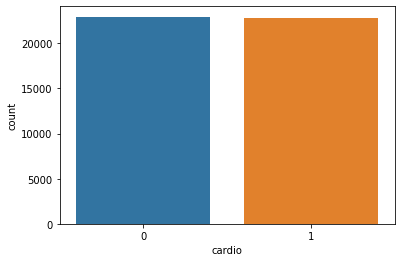

In [ ]:
sns.countplot(x='cardio',data=df)

**2.CORRELATION**

In [ ]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.018102,-0.077601,0.052518,0.023992,0.016777,0.156020,0.094585,-0.042184,-0.029588,-0.009596,0.236131
gender,-0.018102,1.000000,0.496549,0.149735,0.005629,0.016331,-0.037082,-0.020581,0.341737,0.168098,0.005756,0.002772
height,-0.077601,0.496549,1.000000,0.286492,0.008766,0.010433,-0.051983,-0.021756,0.189984,0.094528,-0.008460,-0.011974
weight,0.052518,0.149735,0.286492,1.000000,0.034326,0.041010,0.138098,0.101154,0.065787,0.067468,-0.017479,0.179640
ap_hi,0.023992,0.005629,0.008766,0.034326,1.000000,0.017391,0.031554,0.014951,-0.000328,0.002156,0.000205,0.065682
ap_lo,0.016777,0.016331,0.010433,0.041010,0.017391,1.000000,0.019567,0.011114,0.006873,0.010701,0.003311,0.060593
cholesterol,0.156020,-0.037082,-0.051983,0.138098,0.031554,0.019567,1.000000,0.453399,0.009740,0.032772,0.008938,0.221405
gluc,0.094585,-0.020581,-0.021756,0.101154,0.014951,0.011114,0.453399,1.000000,-0.001521,0.010261,-0.010849,0.086209
smoke,-0.042184,0.341737,0.189984,0.065787,-0.000328,0.006873,0.009740,-0.001521,1.000000,0.336910,0.030236,-0.017167
alco,-0.029588,0.168098,0.094528,0.067468,0.002156,0.010701,0.032772,0.010261,0.336910,1.000000,0.029390,-0.009960


**HEATMAP**

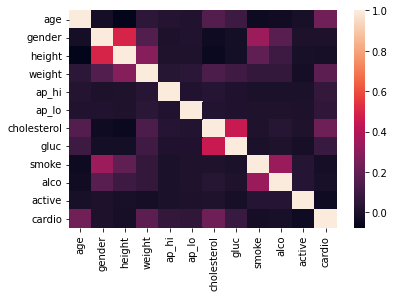

In [ ]:
sns.heatmap(df.corr())

**3.JOINT PLOT**

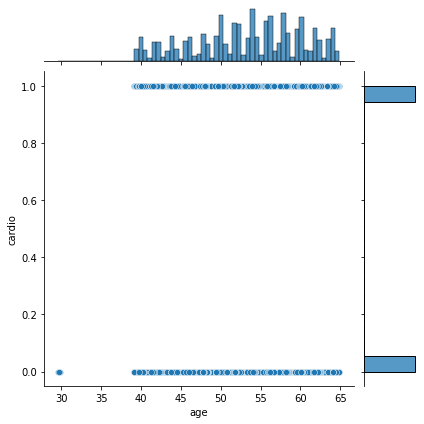

In [ ]:
sns.jointplot(x='age',y='cardio',data=df)

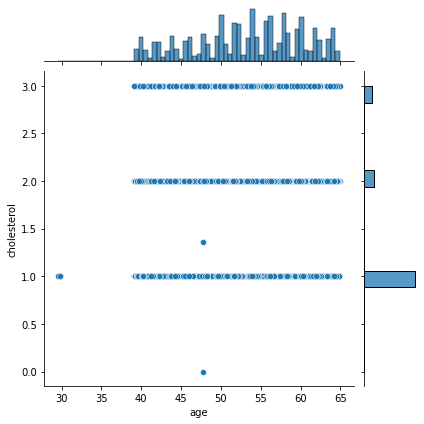

In [ ]:
sns.jointplot(x='age',y='cholesterol',data=df)

**SPLIT THE DATASET INTO FEATURES AND LABELS**

In [ ]:
X=df.drop(columns=['cardio'])
y=df['cardio']

**DIVIDATION OF TRAINING AND TESTING DATA**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train
X_test
y_train
y_test

15300    0
42241    0
24011    1
29193    0
6309     1
        ..
29608    1
27731    1
31616    0
42117    0
20372    1
Name: cardio, Length: 13738, dtype: int64

In [ ]:
sc=StandardScaler()
X_train_new=sc.fit_transform(X_train)
X_test_new=sc.transform(X_test)
X_train_new
X_test_new

array([[-0.40082431, -0.73015264, -0.04349845, ..., -0.31193699,
        -0.23564372,  0.49678623],
       [-1.06680447,  1.36957664, -0.04349845, ..., -0.31193699,
         4.24396113, -2.01306424],
       [ 0.97038272, -0.73015264, -2.21968716, ..., -0.31193699,
        -0.23564372,  0.49678623],
       ...,
       [ 0.07944207, -0.73015264,  0.92369653, ..., -0.31193699,
        -0.23564372,  0.49678623],
       [ 0.44682359, -0.73015264, -2.09878779, ..., -0.31193699,
        -0.23564372,  0.49678623],
       [ 0.94489259, -0.73015264,  0.44009904, ..., -0.31193699,
        -0.23564372, -2.01306424]])

**CREATING DIFFERENT MODELS USING IMBALANCED DATASET**

**1.KNN ALGORITHM**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_new,y_train)
y_pred_knn=knn.predict(X_test_new)
y_pred_knn

array([0, 1, 1, ..., 0, 0, 1])

0.655772310379968
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      6870
           1       0.66      0.63      0.65      6868

    accuracy                           0.66     13738
   macro avg       0.66      0.66      0.66     13738
weighted avg       0.66      0.66      0.66     13738



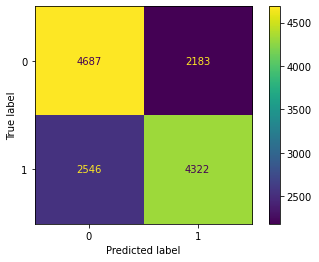

In [ ]:
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)) 

**2.SUPPORT VECTOR MACHINE ALGORITHM**

In [ ]:
sc=SVC()
sc.fit(X_train_new,y_train)
y_pred_svm=sc.predict(X_test_new)
y_pred_svm

array([0, 0, 1, ..., 0, 0, 1])

0.7241228708691222
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6870
           1       0.74      0.68      0.71      6868

    accuracy                           0.72     13738
   macro avg       0.73      0.72      0.72     13738
weighted avg       0.73      0.72      0.72     13738



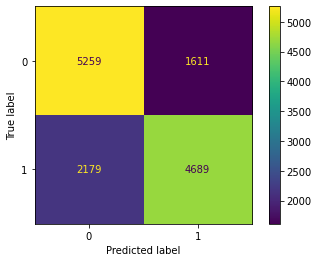

In [ ]:
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm))

**3.DECISION TREE ALGORITHM USING GINI CRITERION**

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train_new,y_train)
y_pred_dc=dtc.predict(X_test_new)
y_pred_dc

array([0, 0, 1, ..., 0, 0, 1])

0.637792982966953
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6870
           1       0.64      0.64      0.64      6868

    accuracy                           0.64     13738
   macro avg       0.64      0.64      0.64     13738
weighted avg       0.64      0.64      0.64     13738



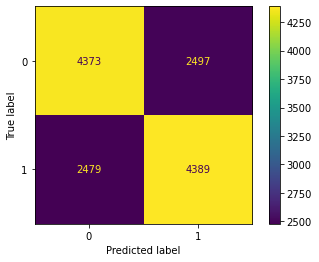

In [ ]:
print(accuracy_score(y_test,y_pred_dc))
print(classification_report(y_test,y_pred_dc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dc))

**4.NAIVE BAYES ALGORITHM**

In [ ]:
ga=GaussianNB()
ga.fit(X_train_new,y_train)
y_pred_gnb=ga.predict(X_test_new)
y_pred_gnb

array([0, 0, 1, ..., 0, 0, 0])

0.586912214296113
              precision    recall  f1-score   support

           0       0.55      0.92      0.69      6870
           1       0.76      0.25      0.38      6868

    accuracy                           0.59     13738
   macro avg       0.66      0.59      0.53     13738
weighted avg       0.66      0.59      0.53     13738



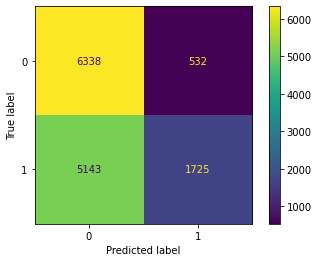

In [ ]:
print(accuracy_score(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gnb))

**5.RANDOM FOREST ALGORITHM**

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_new,y_train)
y_pred_rfc=rf.predict(X_test_new)
y_pred_rfc

array([0, 0, 1, ..., 0, 0, 1])

0.7193186781190858
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      6870
           1       0.73      0.70      0.71      6868

    accuracy                           0.72     13738
   macro avg       0.72      0.72      0.72     13738
weighted avg       0.72      0.72      0.72     13738



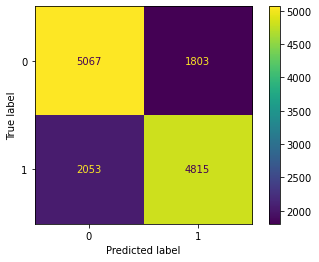

In [ ]:
print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))

**6.LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train_new,y_train)
y_pred_lgr=lr.predict(X_test_new)
y_pred_lgr

array([0, 0, 1, ..., 0, 0, 1])

0.7248507788615519
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6870
           1       0.75      0.67      0.71      6868

    accuracy                           0.72     13738
   macro avg       0.73      0.72      0.72     13738
weighted avg       0.73      0.72      0.72     13738



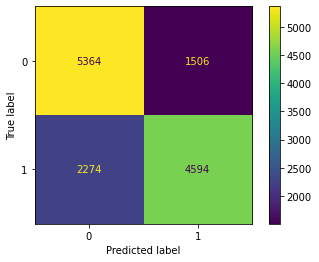

In [ ]:
print(accuracy_score(y_test,y_pred_lgr)) 
print(classification_report(y_test,y_pred_lgr))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lgr)) 

**DIFFERENT ALGORITHMS ON BALANCED DATASET**

*Balanced the data by oversampling technique using SMOTE(Synthetic Minority Oversampling Technique)*

In [ ]:
os=SMOTE()
Xo,yo=os.fit_resample(X,y)
Xo_train,Xo_test,yo_train,yo_test=train_test_split(Xo,yo,test_size=0.3,random_state=1)

In [ ]:
sc=StandardScaler()
Xo_train_new=sc.fit_transform(Xo_train)
Xo_test_new=sc.transform(Xo_test)
Xo_train_new
Xo_test_new

array([[ 0.3488412 ,  1.3682939 ,  0.91616804, ...,  3.18941455,
        -0.23792142,  0.4981442 ],
       [-0.43858515, -0.73083714, -0.28900198, ..., -0.31370144,
        -0.23792142,  0.4981442 ],
       [-0.19645559, -0.73083714,  0.91616804, ..., -0.31370144,
        -0.23792142, -2.00857535],
       ...,
       [-1.77615896, -0.73083714, -0.89158699, ..., -0.31370144,
        -0.23792142,  0.4981442 ],
       [ 1.16658427, -0.73083714, -1.73520601, ..., -0.31370144,
        -0.23792142,  0.4981442 ],
       [-2.0619446 ,  1.3682939 ,  0.55461704, ..., -0.31370144,
        -0.23792142,  0.4981442 ]])

**1.KNN ALGORITHM**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(Xo_train_new,yo_train)
y_pred_knn_os=knn.predict(Xo_test_new)
y_pred_knn_os

array([1, 0, 0, ..., 0, 1, 0])

0.6537371976465461
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      6850
           1       0.67      0.63      0.64      6917

    accuracy                           0.65     13767
   macro avg       0.65      0.65      0.65     13767
weighted avg       0.65      0.65      0.65     13767



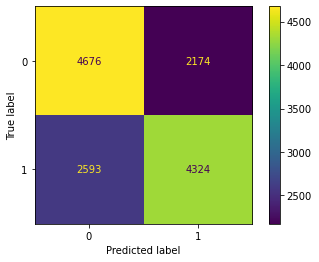

In [ ]:
print(accuracy_score(yo_test,y_pred_knn_os))
print(classification_report(yo_test,y_pred_knn_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_knn_os))

**2.SUPPORT VECTOR MACHINE ALGORITHM**

In [ ]:
sc=SVC()
sc.fit(Xo_train_new,yo_train)
y_pred_svm_os=sc.predict(Xo_test_new)
y_pred_svm_os

array([0, 0, 0, ..., 0, 1, 0])

0.7255030144548558
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6850
           1       0.75      0.68      0.71      6917

    accuracy                           0.73     13767
   macro avg       0.73      0.73      0.73     13767
weighted avg       0.73      0.73      0.73     13767



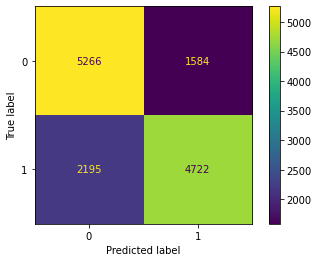

In [ ]:
print(accuracy_score(yo_test,y_pred_svm_os))
print(classification_report(yo_test,y_pred_svm_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_svm_os))

**3.DECISION TREE ALGORITHM USING GINI CRITERION**

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(Xo_train_new,yo_train)
y_pred_dc_os=dtc.predict(Xo_test_new)
y_pred_dc_os

array([1, 1, 1, ..., 0, 1, 0])

0.6320185951913997
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      6850
           1       0.64      0.63      0.63      6917

    accuracy                           0.63     13767
   macro avg       0.63      0.63      0.63     13767
weighted avg       0.63      0.63      0.63     13767



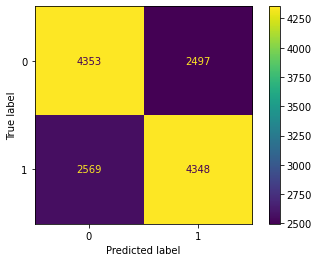

In [ ]:
print(accuracy_score(yo_test,y_pred_dc_os))
print(classification_report(yo_test,y_pred_dc_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_dc_os))

**4.NAIVE BAYES ALGORITHM**

In [ ]:
ga=GaussianNB()
ga.fit(Xo_train_new,yo_train)
y_pred_gnb_os=ga.predict(Xo_test_new)
y_pred_gnb_os

array([0, 0, 0, ..., 0, 0, 0])

0.5883634778818915
              precision    recall  f1-score   support

           0       0.55      0.92      0.69      6850
           1       0.77      0.26      0.38      6917

    accuracy                           0.59     13767
   macro avg       0.66      0.59      0.54     13767
weighted avg       0.66      0.59      0.54     13767



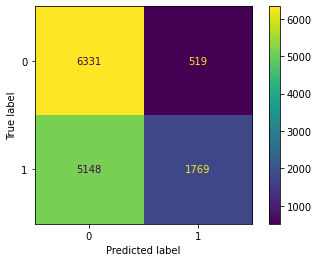

In [ ]:
print(accuracy_score(yo_test,y_pred_gnb_os))
print(classification_report(yo_test,y_pred_gnb_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_gnb_os))

**5.RANDOM FOREST ALGORITHM**

In [ ]:
rf=RandomForestClassifier()
rf.fit(Xo_train_new,yo_train)
y_pred_rfc_os=rf.predict(Xo_test_new)
y_pred_rfc_os

array([0, 0, 0, ..., 0, 1, 0])

0.7190382799447955
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      6850
           1       0.73      0.70      0.71      6917

    accuracy                           0.72     13767
   macro avg       0.72      0.72      0.72     13767
weighted avg       0.72      0.72      0.72     13767



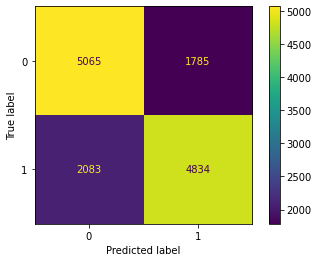

In [ ]:
print(accuracy_score(yo_test,y_pred_rfc_os))
print(classification_report(yo_test,y_pred_rfc_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_rfc_os))

**6.LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression(random_state=0)
lr.fit(Xo_train_new,yo_train)
y_pred_lgr_os=lr.predict(Xo_test_new)
y_pred_lgr_os

array([0, 0, 0, ..., 0, 1, 0])

0.7273189511149851
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6850
           1       0.76      0.67      0.71      6917

    accuracy                           0.73     13767
   macro avg       0.73      0.73      0.73     13767
weighted avg       0.73      0.73      0.73     13767



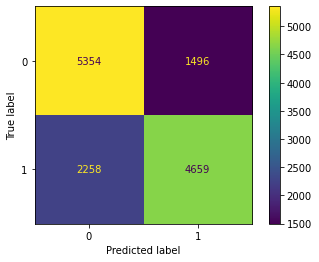

In [ ]:
print(accuracy_score(yo_test,y_pred_lgr_os))
print(classification_report(yo_test,y_pred_lgr_os))
print(ConfusionMatrixDisplay.from_predictions(yo_test,y_pred_lgr_os))

In [ ]:
acc=pd.DataFrame()
acc['Classifier']=['KNN','SVM','DECISION TREE','NAIVE BAYES','RANDOM FOREST','LOGISTIC REGRESSION']
acc['Accuracy of imbalanced data']=[accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_dc),accuracy_score(y_test,y_pred_gnb),accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_lgr)]
acc['Accuracy of balanced data']=[accuracy_score(yo_test,y_pred_knn_os),accuracy_score(yo_test,y_pred_svm_os),accuracy_score(yo_test,y_pred_dc_os),accuracy_score(yo_test,y_pred_gnb_os),accuracy_score(yo_test,y_pred_rfc_os),accuracy_score(yo_test,y_pred_lgr_os)]
acc

,Classifier,Accuracy of imbalanced data,Accuracy of balanced data
0,KNN,0.655772,0.653737
1,SVM,0.724123,0.725503
2,DECISION TREE,0.637793,0.632019
3,NAIVE BAYES,0.586912,0.588363
4,RANDOM FOREST,0.719319,0.719038
5,LOGISTIC REGRESSION,0.724851,0.727319


Model created with Support Vector Machine(SVM) using Balanced dataset gives highest accuracy about 73.02%